## Keras MNIST Fashion Save Model Example

Single fully connected hidden layer exported for prediction on device with tensor/io. Exported using the keras `model.save` api.

Based on https://www.tensorflow.org/tutorials/keras/classification

In [1]:
import os
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub

from tensorflow.keras import layers

import PIL.Image as Image
import matplotlib.pylab as plt

%matplotlib inline

In [2]:
def enable_memory_growth():
    physical_devices = tf.config.experimental.list_physical_devices('GPU') 
    try: 
        tf.config.experimental.set_memory_growth(physical_devices[0], True)
        # tf.config.gpu.set_per_process_memory_growth(True)
        # tf.config.gpu.set_per_process_memory_fraction(0.75)
    except: 
        print('Invalid device or cannot modify virtual devices once initialized.')

        
if "TF_GPU_GROWTH" in os.environ:
    print("Enabling GPU memory growth")
    enable_memory_growth()

Enabling GPU memory growth
Invalid device or cannot modify virtual devices once initialized.


## Fashion MNIST

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
class_names = [
    'T-shirt/top', 
    'Trouser', 
    'Pullover', 
    'Dress', 
    'Coat',
    'Sandal', 
    'Shirt', 
    'Sneaker', 
    'Bag', 
    'Ankle boot'
]

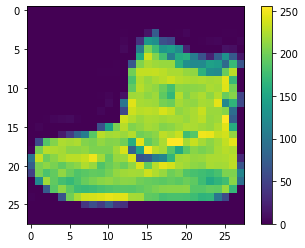

In [5]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()    

In [6]:
train_images = train_images / 255.0
test_images = test_images / 255.0

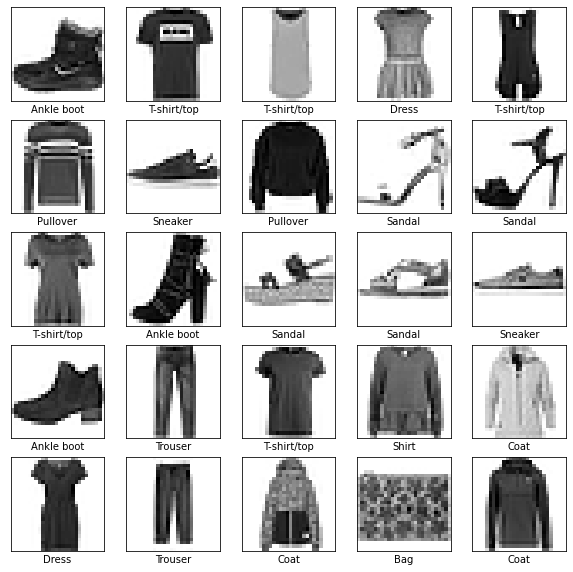

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Model

In [8]:
def make_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10)
    ])
    return model

In [9]:
model = make_model()

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.4968 - accuracy: 0.8255
Epoch 2/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.3759 - accuracy: 0.8636
Epoch 3/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.3379 - accuracy: 0.8763
Epoch 4/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.3139 - accuracy: 0.8849
Epoch 5/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2929 - accuracy: 0.8930
Epoch 6/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2805 - accuracy: 0.8963
Epoch 7/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2694 - accuracy: 0.9009
Epoch 8/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.2562 - accuracy: 0.9047
Epoch 9/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2466 - accuracy: 0.9082
Epoch 10/10
60

In [12]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

10000/1 - 0s - loss: 0.2444 - accuracy: 0.8769

Test accuracy: 0.8769


In [13]:
probability_model = tf.keras.Sequential([
    model, 
    tf.keras.layers.Softmax()
])

In [14]:
predictions = probability_model.predict(test_images)

In [15]:
predictions[0]

array([3.8592901e-08, 2.1657182e-10, 1.6416449e-09, 5.4291268e-12,
       2.2380622e-09, 8.6304623e-05, 1.7574804e-08, 5.1758118e-04,
       3.0085374e-08, 9.9939609e-01], dtype=float32)

In [16]:
np.argmax(predictions[0])

9

In [17]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
        100*np.max(predictions_array),
        class_names[true_label]),
        color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

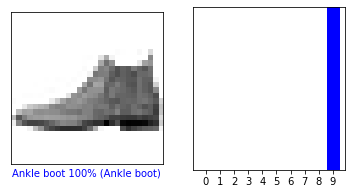

In [18]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

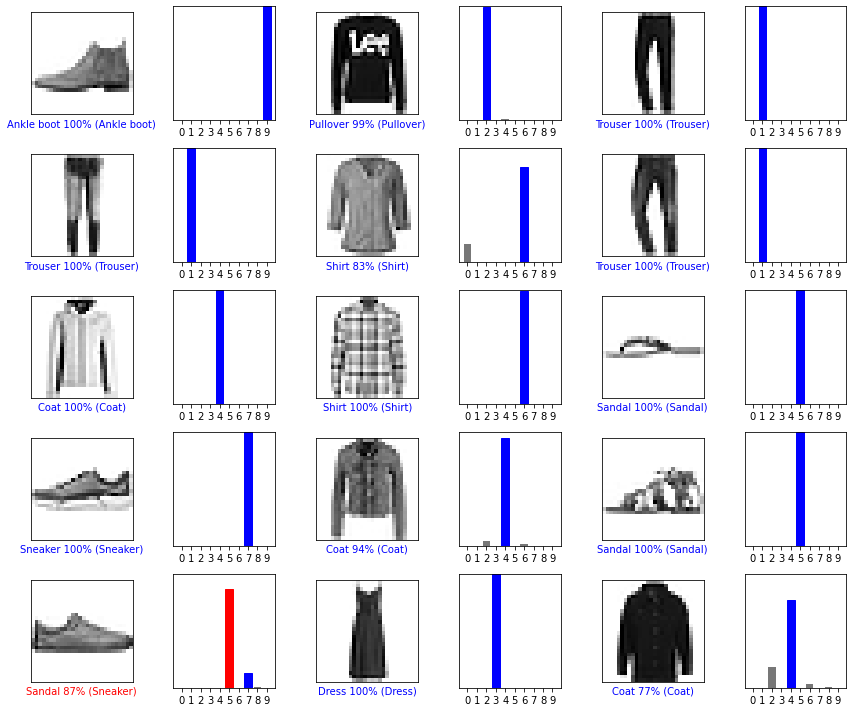

In [19]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Export with model.save

In [21]:
PATH = 'tmp/keras-mnist-clothing-save-model'
model.save(PATH, save_format='tf')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: tmp/keras-mnist-clothing-save-model/assets


### Results

In [24]:
! saved_model_cli show --all --dir tmp/keras-mnist-clothing-save-model/


MetaGraphDef with tag-set: 'serve' contains the following SignatureDefs:

signature_def['__saved_model_init_op']:
  The given SavedModel SignatureDef contains the following input(s):
  The given SavedModel SignatureDef contains the following output(s):
    outputs['__saved_model_init_op'] tensor_info:
        dtype: DT_INVALID
        shape: unknown_rank
        name: NoOp
  Method name is: 

signature_def['serving_default']:
  The given SavedModel SignatureDef contains the following input(s):
    inputs['flatten_input'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 28, 28)
        name: serving_default_flatten_input:0
  The given SavedModel SignatureDef contains the following output(s):
    outputs['dense_1'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 10)
        name: StatefulPartitionedCall:0
  Method name is: tensorflow/serving/predict


### Tensor/IO

Note in the corresponding model.json that the name and shape of the inputs and outputs matches the values you see in the signature definition. Take special care to note that the name is taken from the layer's name and not from the key in the inputs or outputs dictionary:

```
inputs['flatten_input'] tensor_info:
    dtype: DT_FLOAT
    shape: (-1, 28, 28)
    name: serving_default_flatten_input:0

outputs['dense_1'] tensor_info:
    dtype: DT_FLOAT
    shape: (-1, 10)
    name: StatefulPartitionedCall:0
```

In [1]:
! cat model.json

{
	"name": "Keras MNIST Fashion Save Model Example",
	"details": "Basic Keras Model for Fashion MNSIT dataset exported for prediction using the keras model.save api",
	"id": "keras-mnist-clothing-save-model",
	"version": "1",
	"author": "doc.ai",
	"license": "Apache License. Version 2.0 http://www.apache.org/licenses/LICENSE-2.0",
	"model": {
		"file": "predict",
		"quantized": false,
		"type": "mnist.fashion.keras",
		"backend": "tensorflow",
		"modes": ["predict"]
	},
	"inputs": [
		{
			"name": "serving_default_flatten_input",
			"type": "array",
			"shape": [-1,28,28]
		}
	],
	"outputs": [
		{
			"name": "StatefulPartitionedCall",
			"type": "array",
			"shape": [-1,10]
		}
	]
}

I can execute this model on device with Tensor/IO, although I'm not sure if I need to initialize variables differently given the `__saved_model_init_op` listed above. I believe I use a session global variables initializer in the C++ code.